In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/c/titanic/train.csv
/kaggle/input/c/titanic/test.csv
/kaggle/input/c/titanic/gender_submission.csv


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,Nadam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow import keras
import seaborn as sns
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

2022-02-05 12:25:50.896192: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-02-05 12:25:50.896331: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
gender_submission = pd.read_csv(r"../input/c/titanic/gender_submission.csv")
train_data = pd.read_csv(r"../input/c/titanic/train.csv")
test_data = pd.read_csv(r"../input/c/titanic/test.csv")

In [4]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

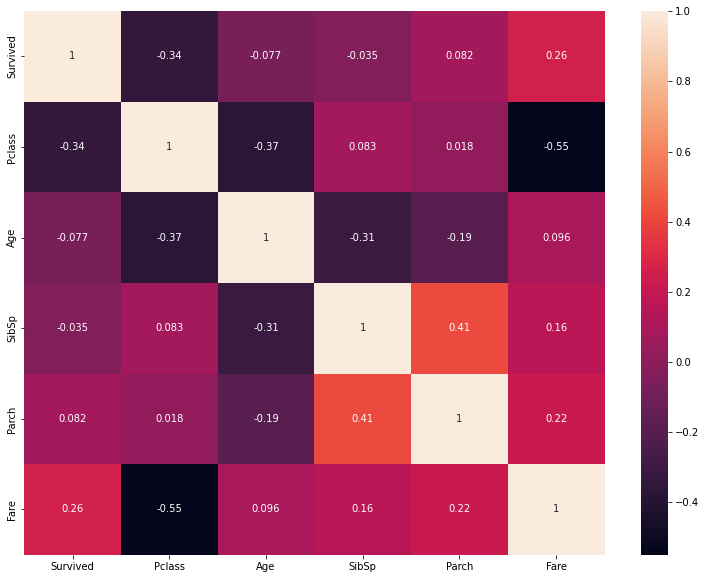

In [8]:
cov_plot=train_data.drop(columns=['PassengerId']).corr()
plt.figure(figsize=(13,10))
sns.heatmap(cov_plot,annot=True)

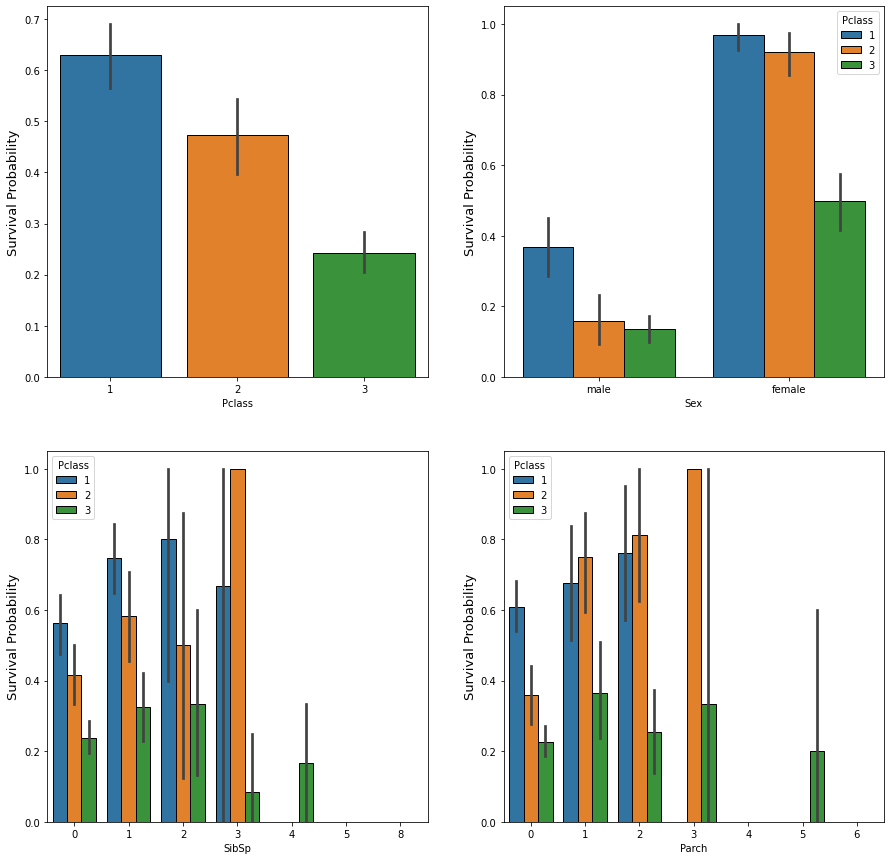

In [9]:
def barplot(feature,axis,hue_on=True):
    
    if hue_on==True:
        plot=sns.barplot(x=feature,y="Survived",hue="Pclass",data=train_data,edgecolor='k',ax=axis)
    else:
        plot=sns.barplot(x=feature,y="Survived",data=train_data,edgecolor='k',ax=axis)
        
    plt.ylabel("Survival Probability",fontsize=13)

    
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
barplot("Pclass",ax1,False)
ax2 = fig.add_subplot(222)
barplot("Sex",ax2)
ax3 = fig.add_subplot(223)
barplot("SibSp",ax3)
ax4 = fig.add_subplot(224)
barplot("Parch",ax4)

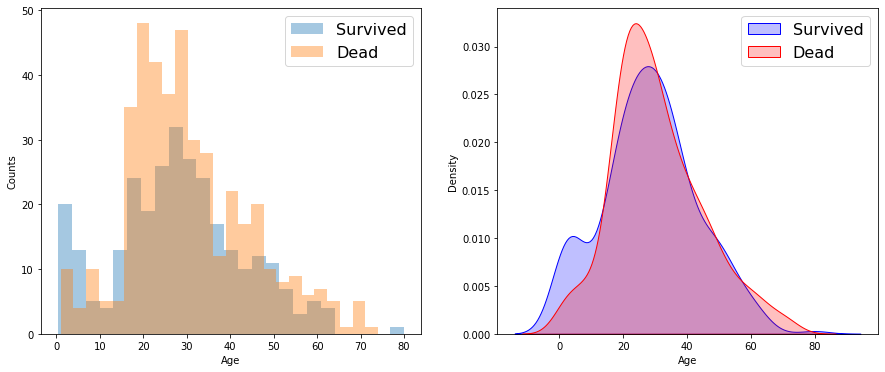

In [10]:
fig = plt.figure(2,figsize=(15,6))
ax5 = fig.add_subplot(121)
train_data[train_data['Survived']==1]['Age'].hist(grid=False,alpha=0.4,bins=25,label='Survived',ax=ax5)
train_data[train_data['Survived']==0]['Age'].hist(grid=False,alpha=0.4,bins=25,label='Dead',ax=ax5)
plt.xlabel('Age');plt.ylabel('Counts')
plt.legend(fontsize=16)

ax6 = fig.add_subplot(122)
#train_data[train_data['Survived']==1]['Age'].plot.kde(grid=False,alpha=0.4,label='Survived',ax=ax6)
#train_data[train_data['Survived']==0]['Age'].plot.kde(grid=False,alpha=0.4,label='Dead',ax=ax6)
plot=sns.kdeplot(train_data["Age"][(train_data["Survived"] == 1) & (train_data["Age"].notnull())], color="blue", shade= True,ax=ax6)
plot=sns.kdeplot(train_data["Age"][(train_data["Survived"] == 0) & (train_data["Age"].notnull())], color="Red", shade = True,ax=ax6)
plot = plot.legend(["Survived","Dead"],fontsize=16)


Text(0, 0.5, 'Survival Probability')

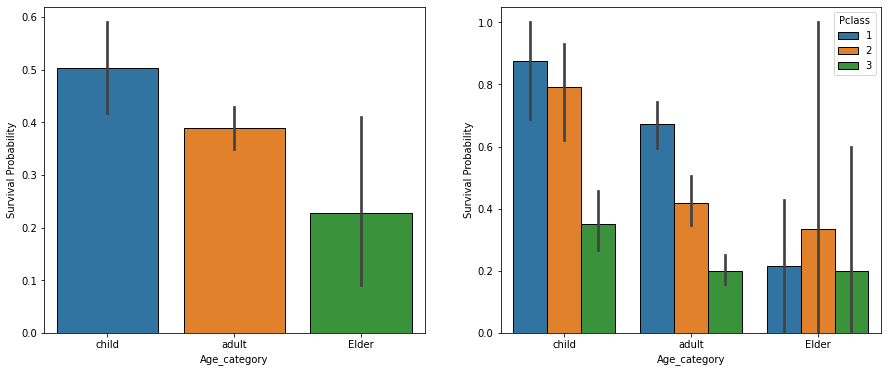

In [11]:
train_data["Age_category"]=pd.cut(train_data['Age'],bins=[0,18,60,max(train_data["Age"])],labels=['child','adult','Elder'])
train_data["Age_category"].value_counts()

fig=plt.figure(3,figsize=(15,6))

ax7 = fig.add_subplot(121)
plot = sns.barplot(x="Age_category", y="Survived", data=train_data,ax=ax7,edgecolor='k')
plt.ylabel("Survival Probability")
ax8 = fig.add_subplot(122)
plot2 = sns.barplot(x="Age_category", y="Survived", hue="Pclass", data=train_data,ax=ax8,edgecolor='k')
plt.ylabel("Survival Probability")

Text(0, 0.5, 'Survival Probability')

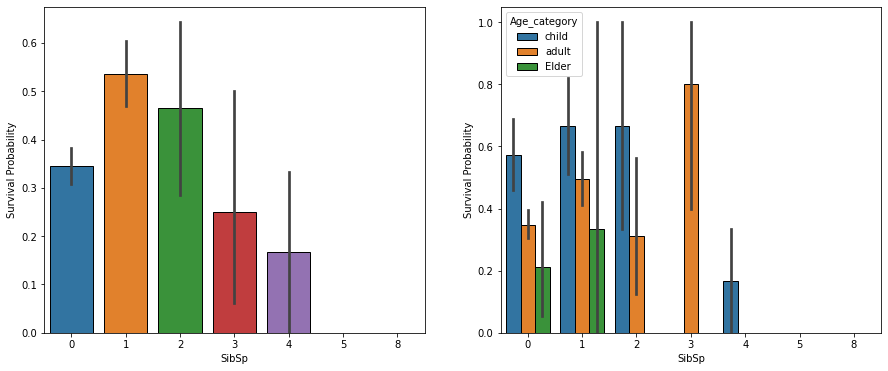

In [12]:
fig=plt.figure(figsize=(15,6))

ax9 = fig.add_subplot(121)
plot=sns.barplot(x="SibSp", y="Survived", data=train_data,edgecolor='k',ax=ax9)
plt.ylabel("Survival Probability")

ax10 = fig.add_subplot(122)
plot2=sns.barplot(x="SibSp", y="Survived", hue="Age_category", data=train_data,edgecolor='k',ax=ax10)
plt.ylabel("Survival Probability")

Text(0, 0.5, 'Survival Probability')

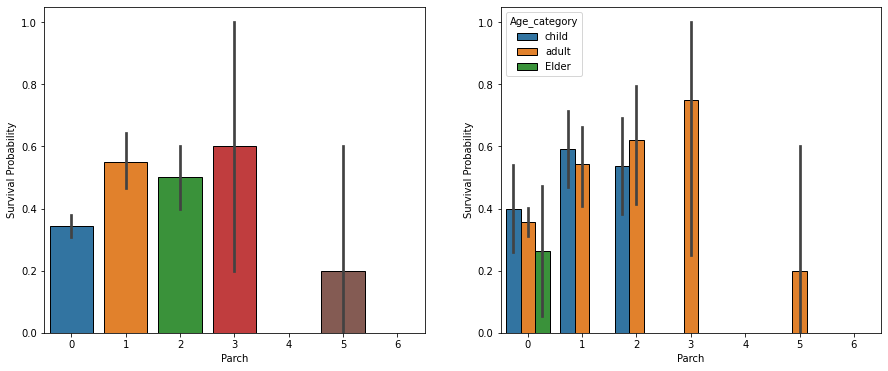

In [13]:
fig=plt.figure(figsize=(15,6))

ax9 = fig.add_subplot(121)
plot=sns.barplot(x="Parch", y="Survived", data=train_data,edgecolor='k',ax=ax9)
plt.ylabel("Survival Probability")

ax10 = fig.add_subplot(122)
plot2=sns.barplot(x="Parch", y="Survived", hue="Age_category", data=train_data,edgecolor='k',ax=ax10)
plt.ylabel("Survival Probability")

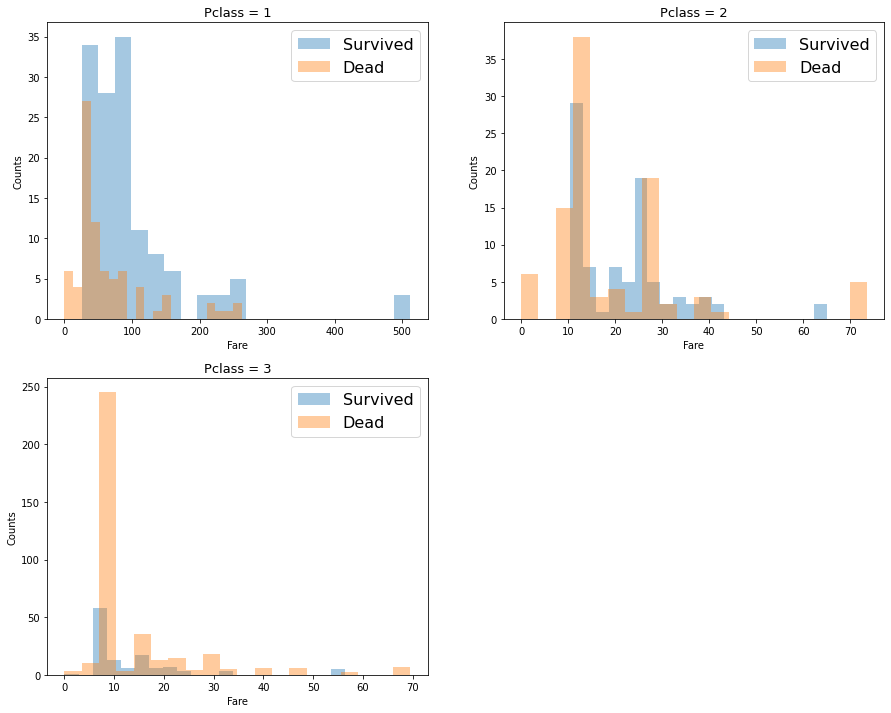

In [14]:
fig = plt.figure(2,figsize=(15,12))
ax5 = fig.add_subplot(221)
train_data[(train_data['Survived']==1) & (train_data['Pclass']==1)]['Fare'].hist(grid=False,alpha=0.4,bins=20,label='Survived',ax=ax5)
train_data[(train_data['Survived']==0) & (train_data['Pclass']==1)]['Fare'].hist(grid=False,alpha=0.4,bins=20,label='Dead',ax=ax5)
plt.xlabel('Fare');plt.ylabel('Counts')
plt.title('Pclass = 1',fontsize=13)
plt.legend(fontsize=16)

ax6 = fig.add_subplot(222)
train_data[(train_data['Survived']==1) & (train_data['Pclass']==2)]['Fare'].hist(grid=False,alpha=0.4,bins=20,label='Survived',ax=ax6)
train_data[(train_data['Survived']==0) & (train_data['Pclass']==2)]['Fare'].hist(grid=False,alpha=0.4,bins=20,label='Dead',ax=ax6)
plt.xlabel('Fare');plt.ylabel('Counts')
plt.title('Pclass = 2',fontsize=13)
plt.legend(fontsize=16)

ax7 = fig.add_subplot(223)
train_data[(train_data['Survived']==1) & (train_data['Pclass']==3)]['Fare'].hist(grid=False,alpha=0.4,bins=20,label='Survived',ax=ax7)
train_data[(train_data['Survived']==0) & (train_data['Pclass']==3)]['Fare'].hist(grid=False,alpha=0.4,bins=20,label='Dead',ax=ax7)
plt.xlabel('Fare');plt.ylabel('Counts')
plt.title('Pclass = 3',fontsize=13)
plt.legend(fontsize=16)

In [15]:
train_data[['Fare','Name','Ticket','SibSp','Parch','Sex']].iloc[train_data.index[(train_data['Pclass']==3) & (train_data['Fare']>60)]]

,Fare,Name,Ticket,SibSp,Parch,Sex
159,69.55,"Sage, Master. Thomas Henry",CA. 2343,8,2,male
180,69.55,"Sage, Miss. Constance Gladys",CA. 2343,8,2,female
201,69.55,"Sage, Mr. Frederick",CA. 2343,8,2,male
324,69.55,"Sage, Mr. George John Jr",CA. 2343,8,2,male
792,69.55,"Sage, Miss. Stella Anna",CA. 2343,8,2,female
846,69.55,"Sage, Mr. Douglas Bullen",CA. 2343,8,2,male
863,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",CA. 2343,8,2,female


In [16]:
train_data['FareCorr'] = train_data['Fare'].copy()

for grp, grp_df in train_data[['Ticket', 'Name', 'Pclass', 'Fare', 'PassengerId']].groupby(['Ticket']):
    
    if (len(grp_df) != 1):
        
        for ind, row in grp_df.iterrows():
            passID = row['PassengerId']
            train_data.loc[train_data['PassengerId'] == passID, 'FareCorr'] = train_data['Fare'][train_data['PassengerId'] == passID]/len(grp_df)

In [17]:
test_data['FareCorr'] = test_data['Fare'].copy()

for grp, grp_df in test_data[['Ticket', 'Name', 'Pclass', 'Fare', 'PassengerId']].groupby(['Ticket']):
    
    if (len(grp_df) != 1):
        
        for ind, row in grp_df.iterrows():
            passID = row['PassengerId']
            test_data.loc[test_data['PassengerId'] == passID, 'FareCorr'] = test_data['Fare'][test_data['PassengerId'] == passID]/len(grp_df)

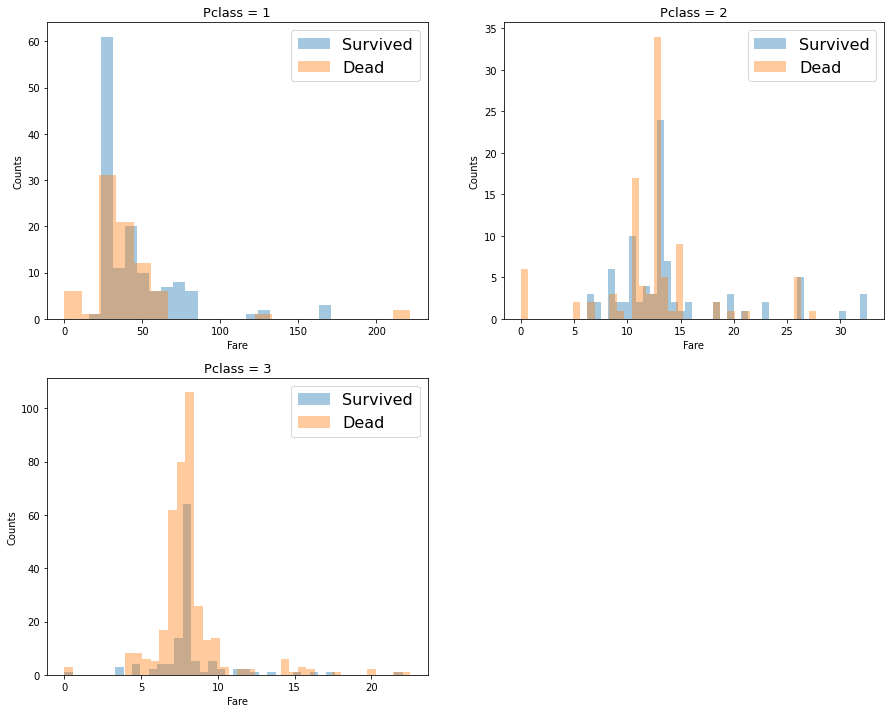

In [18]:
fig = plt.figure(2,figsize=(15,12))
ax5 = fig.add_subplot(221)
train_data[(train_data['Survived']==1) & (train_data['Pclass']==1)]['FareCorr'].hist(grid=False,alpha=0.4,bins=20,label='Survived',ax=ax5)
train_data[(train_data['Survived']==0) & (train_data['Pclass']==1)]['FareCorr'].hist(grid=False,alpha=0.4,bins=20,label='Dead',ax=ax5)
plt.xlabel('Fare');plt.ylabel('Counts')
plt.title('Pclass = 1',fontsize=13)
plt.legend(fontsize=16)

ax6 = fig.add_subplot(222)
train_data[(train_data['Survived']==1) & (train_data['Pclass']==2)]['FareCorr'].hist(grid=False,alpha=0.4,bins=40,label='Survived',ax=ax6)
train_data[(train_data['Survived']==0) & (train_data['Pclass']==2)]['FareCorr'].hist(grid=False,alpha=0.4,bins=40,label='Dead',ax=ax6)
plt.xlabel('Fare');plt.ylabel('Counts')
plt.title('Pclass = 2',fontsize=13)
plt.legend(fontsize=16)

ax7 = fig.add_subplot(223)
train_data[(train_data['Survived']==1) & (train_data['Pclass']==3)]['FareCorr'].hist(grid=False,alpha=0.4,bins=40,label='Survived',ax=ax7)
train_data[(train_data['Survived']==0) & (train_data['Pclass']==3)]['FareCorr'].hist(grid=False,alpha=0.4,bins=40,label='Dead',ax=ax7)
plt.xlabel('Fare');plt.ylabel('Counts')
plt.title('Pclass = 3',fontsize=13)
plt.legend(fontsize=16)

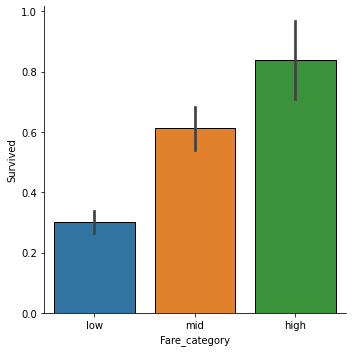

In [19]:
train_data['Fare_category']=pd.cut(train_data['FareCorr'], bins=[0,25,65,max(train_data["FareCorr"]+1)], labels=['low','mid','high'])
test_data['Fare_category']=pd.cut(test_data['FareCorr'], bins=[0,25,65,max(test_data["FareCorr"]+1)], labels=['low','mid','high'])
#train_data['Fare_category'].value_counts()
plot = sns.catplot(x="Fare_category", y='Survived',kind="bar", data=train_data, height=5, aspect=1,edgecolor='k')

In [20]:
train_data['Fare_category']

0       low
1      high
2       low
3       mid
4       low
       ... 
886     low
887     mid
888     low
889     mid
890     low
Name: Fare_category, Length: 891, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

In [21]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].median())
train_data["Age_category"]= pd.cut(train_data["Age"], bins=[0,15,30,45,60,max(train_data["Age"]+1)], labels=['1','2','3','4','5'])

test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())
test_data["Age_category"]= pd.cut(test_data["Age"], bins=[0,15,30,45,60,max(test_data["Age"]+1)], labels=['1','2','3','4','5'])

train_data['Age_category'].value_counts()

2    503
3    202
1     83
4     81
5     22
Name: Age_category, dtype: int64

In [22]:
train_data.loc[train_data['SibSp'] + train_data['Parch'] + 1 == 1, 'FamilySize'] = 'Single'
train_data.loc[train_data['SibSp'] + train_data['Parch'] + 1 > 1 , 'FamilySize'] = 'Small'
train_data.loc[train_data['SibSp'] + train_data['Parch'] + 1 > 4 , 'FamilySize'] = 'Big'

test_data.loc[test_data['SibSp'] + test_data['Parch'] + 1 == 1, 'FamilySize'] = 'Single'
test_data.loc[test_data['SibSp'] + test_data['Parch'] + 1 > 1 , 'FamilySize'] = 'Small'
test_data.loc[test_data['SibSp'] + test_data['Parch'] + 1 > 4 , 'FamilySize'] = 'Big'

train_data.FamilySize.value_counts()

Single    537
Small     292
Big        62
Name: FamilySize, dtype: int64

In [23]:
fa = train_data[train_data["Pclass"] == 3]
train_data['FareCorr'].fillna(fa['FareCorr'].median(), inplace = True)

fa = test_data[test_data["Pclass"] == 3]
test_data['FareCorr'].fillna(fa['FareCorr'].median(), inplace = True)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   Age            891 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Cabin          204 non-null    object  
 11  Embarked       889 non-null    object  
 12  Age_category   891 non-null    category
 13  FareCorr       891 non-null    float64 
 14  Fare_category  876 non-null    category
 15  FamilySize     891 non-null    object  
dtypes: category(2), float64(3), int64(5), object(6)
memory usage: 99.7+ KB


In [24]:
train_data['Fare_category']=pd.qcut(train_data['FareCorr'], 7, labels=[1,2,3,4,5,6,7])
test_data['Fare_category']=pd.qcut(test_data['FareCorr'], 7, labels=[1,2,3,4,5,6,7])
train_data['Fare_category'].value_counts()

3    143
1    139
7    128
6    127
4    122
2    116
5    116
Name: Fare_category, dtype: int64

In [25]:
print("The shape of train_data = ",train_data.shape)
print("The shape of test_data = ",test_data.shape)

The shape of train_data =  (891, 16)
The shape of test_data =  (418, 15)


In [26]:
#X_train=train_data.drop(['PassengerId','Name','Ticket','Cabin','Survived','Age','Fare','Parch','SibSp','Embarked','FareCorr'],axis=1)
#y_train=train_data['Survived']
#X_test=test_data.drop(['PassengerId','Name','Ticket','Cabin','Age','Fare'],axis=1)
data_pre = train_data.drop(['Embarked','Survived','PassengerId','Name','Age','Parch','SibSp','Ticket','Fare','Cabin','FareCorr'],axis=1)
data_test = test_data.drop(['Embarked','PassengerId','Name','Age','Parch','SibSp','Ticket','Fare','Cabin','FareCorr'],axis=1)
data_test

,Pclass,Sex,Fare_category,Age_category,FamilySize
0,3,male,2,3,Single
1,3,female,1,4,Small
2,2,male,3,5,Single
3,3,male,3,2,Single
4,3,female,4,2,Small
...,...,...,...,...,...
413,3,male,3,2,Single
414,1,female,7,3,Single
415,3,male,1,3,Single
416,3,male,3,2,Single


In [27]:
print("The shape of train_data = ",data_pre.shape)
print("The shape of test_data = ",data_test.shape)

The shape of train_data =  (891, 5)
The shape of test_data =  (418, 5)


In [28]:
num_attribs=[]
cat_attribs = list( data_pre.drop(labels=num_attribs, axis=1).columns)

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('cat', OneHotEncoder()),
    ])

full_pipeline = ColumnTransformer([
        ('cat', cat_pipeline, cat_attribs),
    ])

data_post = full_pipeline.fit_transform(data_pre)

oneHot=OneHotEncoder()
data_post_alt=oneHot.fit_transform(data_pre[cat_attribs])

feature_names = oneHot.get_feature_names(data_pre.columns)
feature_names

array(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_category_1', 'Age_category_2', 'Age_category_3',
       'Age_category_4', 'Age_category_5', 'Fare_category_1',
       'Fare_category_2', 'Fare_category_3', 'Fare_category_4',
       'Fare_category_5', 'Fare_category_6', 'Fare_category_7',
       'FamilySize_Big', 'FamilySize_Single', 'FamilySize_Small'],
      dtype=object)

In [29]:
num_attribs_test=[]
cat_attribs_test = list( data_test.drop(labels=num_attribs_test, axis=1).columns)

cat_pipeline_test = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('cat', OneHotEncoder()),
    ])

full_pipeline_test = ColumnTransformer([
        ('cat', cat_pipeline_test, cat_attribs_test),
    ])

data_pos_test = full_pipeline_test.fit_transform(data_test)

oneHot_test=OneHotEncoder()
data_post_alt_test=oneHot_test.fit_transform(data_test[cat_attribs_test])

feature_names_test = oneHot_test.get_feature_names(data_test.columns)
feature_names_test

array(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Fare_category_1', 'Fare_category_2', 'Fare_category_3',
       'Fare_category_4', 'Fare_category_5', 'Fare_category_6',
       'Fare_category_7', 'Age_category_1', 'Age_category_2',
       'Age_category_3', 'Age_category_4', 'Age_category_5',
       'FamilySize_Big', 'FamilySize_Single', 'FamilySize_Small'],
      dtype=object)

In [30]:
# training data
X_train = data_post[:len(train_data['Survived']),:].toarray()
y_train = train_data['Survived'].copy().to_numpy()   # traget


# test data
X_test=data_pos_test[:len(train_data['Survived']),:].toarray()
#X_test = data_post[len(train_data['Survived']):,:].toarray()
print('# instances: '+ str(X_train.shape[0]))
print('# features: '+ str(X_train.shape[1]))
print('# instances: '+ str(X_test.shape[0]))
print('# features: '+ str(X_test.shape[1]))

# instances: 891
# features: 20
# instances: 418
# features: 20


In [31]:
#print("Train_data:")
#print(X_train.isnull().any())
#print("--------------------")
#print("Test_data:")
#print(X_test.isnull().any())

In [32]:
#print(X_train['Fare_category'].count(None))
#print(X_test['Cabin'].count(None))

In [33]:
#X_train['Age']=X_train['Age'].fillna(X_train['Age'].mean())
#X_test['Age']=X_test['Age'].fillna(X_test['Age'].mean())
#X_train['Fare']=X_train['Fare'].fillna(X_train['Fare'].mean())
#X_test['Fare']=X_test['Fare'].fillna(X_test['Fare'].mean())
#X_train['Embarked']=X_train['Embarked'].fillna('S')
#X_test['Embarked']=X_test['Embarked'].fillna('S')
#X_train['family']=X_train['SibSp']+X_train['Parch']+1
#X_test['family']=X_test['SibSp']+X_train['Parch']+1
#X_train=X_train.drop(['SibSp','Parch'],axis=1)
#X_test=X_test.drop(['SibSp','Parch'],axis=1)

In [34]:
def Sex_transform(df):
    df['Sex']=pd.Categorical(df['Sex'])
    df['Sex']=df['Sex'].cat.codes
    return df
def Embark_transform(df):
    df['Embarked']=pd.Categorical(df['Embarked'])
    df['Embarked']=df['Embarked'].cat.codes
    return df
def Cabins_transform(df):
    df['Cabin'] = df['Cabin'].fillna('S')
    df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
    df['Cabin'] =  pd.Categorical(df['Cabin'])
    df['Cabin'] = df['Cabin'].cat.codes 
    return df
def Fare_standard(df):
    df['Fare']=(df['Fare']-df['Fare'].mean())/df['Fare'].std()
    return df
def Age_standard(df):
    df['Age']=(df['Age']-df['Age'].mean())/df['Age'].std()
def Age_transform(df):
    df['Age_category']=pd.Categorical(df['Age_category'])
    df['Age_category']=df['Age_category'].cat.codes
def Fare_transform(df):
    df['Fare_category']=pd.Categorical(df['Fare_category'])
    df['Fare_category']=df['Fare_category'].cat.codes
def Family_transform(df):
    df['FamilySize']=pd.Categorical(df['FamilySize'])
    df['FamilySize']=df['FamilySize'].cat.codes
    

In [35]:
def transform(df):
    Sex_transform(df)
    Fare_transform(df)
    Age_transform(df)
    Family_transform(df)
    #Cabins_transform(df)
    #Fare_standard(df)
    #Age_standard(df)
    #Embark_transform(df)


#transform(X_train)
#transform(X_test)

In [36]:
#X_train=np.array(X_train)
#X_test=np.array(X_test)
#X_train.shape

In [37]:
#X_train

In [38]:
model=Sequential()

model.add(Dense(units=64,activation='relu',input_shape=(20,),kernel_initializer='lecun_normal'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Dense(units=32,activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))


model.add(Dense(units=16,activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))



model.add(Dense(units=1,activation='sigmoid'))

2022-02-05 12:26:10.221219: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-05 12:26:10.224635: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-02-05 12:26:10.224682: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-05 12:26:10.224744: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (705b47005bbc): /proc/driver/nvidia/version does not exist
2022-02-05 12:26:10.225766: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [39]:
output_dir="../"
checkpoint_filepath = "cp-{epoch:04d}.ckpt"
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999),metrics=['binary_accuracy'])
early_stop=EarlyStopping(monitor='val_loss',patience=20)
check_point=ModelCheckpoint(filepath=output_dir+checkpoint_filepath, save_weights_only=True,period=2)

In [40]:
history=model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=0.5,callbacks=[early_stop,check_point])

2022-02-05 12:26:10.685384: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-05 12:26:10.700025: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/20
14/14 [==============================] - 1s 57ms/step - loss: 0.7144 - binary_accuracy: 0.4099 - val_loss: 0.6626 - val_binary_accuracy: 0.6973
Epoch 2/20
14/14 [==============================] - 0s 8ms/step - loss: 0.6600 - binary_accuracy: 0.6617 - val_loss: 0.6240 - val_binary_accuracy: 0.7354
Epoch 3/20
14/14 [==============================] - 0s 8ms/step - loss: 0.6336 - binary_accuracy: 0.6836 - val_loss: 0.5798 - val_binary_accuracy: 0.7758
Epoch 4/20
14/14 [==============================] - 0s 8ms/step - loss: 0.5682 - binary_accuracy: 0.7573 - val_loss: 0.5257 - val_binary_accuracy: 0.7937
Epoch 5/20
14/14 [==============================] - 0s 8ms/step - loss: 0.5175 - binary_accuracy: 0.7888 - val_loss: 0.4822 - val_binary_accuracy: 0.7982
Epoch 6/20
14/14 [==============================] - 0s 8ms/step - loss: 0.4636 - binary_accuracy: 0.8059 - val_loss: 0.4675 - val_binary_accuracy: 0.7960
Epoch 7/20
14/14 [==============================] - 0s 8ms/step - loss: 0.4

(array([0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

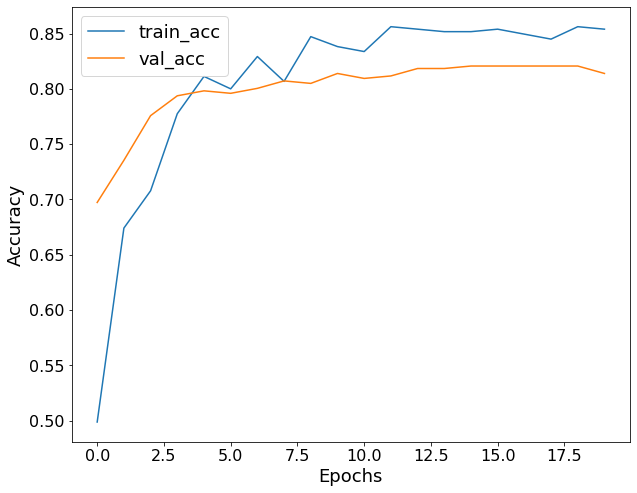

In [41]:
plt.figure(figsize=(10,8))
plt.plot(history.history['binary_accuracy'],label='train_acc')
plt.plot(history.history['val_binary_accuracy'],label='val_acc')
plt.legend(fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

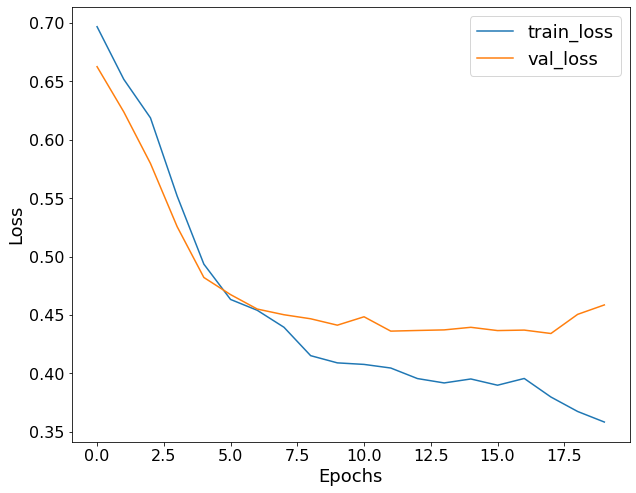

In [42]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend(fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [43]:
predictions = model.predict_classes(X_test)
ids = test_data['PassengerId'].copy()
output = ids.to_frame()
output["Survived"]=predictions
output.head(100)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
95,987,0
96,988,1
97,989,0
98,990,0


In [44]:
output.to_csv("submission.csv",index=False)
print("Yes")

Yes
